In [51]:
import pandas as pd
import numpy as np
import collections
import operator #
import matplotlib.pyplot as plt
from itertools import islice
%matplotlib inline

In [2]:
#Load the dataset
data = pd.read_csv("/Users/Rohit/Desktop/Data/test.txt", sep="\t")
mydict = {}
data.shape

(3614506, 5)

In [3]:
data.head()

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com


In [4]:
userlist = data.AnonID.unique()
len(userlist) #No of unique users

66000

In [5]:
total = 0
for i in data.AnonID:
    if i in mydict: 
        mydict[i] += 1
    else: 
        mydict[i] = 1
    total+=1

In [6]:
mydict

{23199746: 6,
 12713987: 4,
 4718597: 76,
 3014663: 41,
 8126473: 17,
 393226: 388,
 22893911: 2,
 23068684: 8,
 9240578: 104,
 5767185: 6,
 6422546: 1,
 13500436: 173,
 6946837: 10,
 1441814: 364,
 23843375: 8,
 8650780: 39,
 8519709: 127,
 19398686: 8,
 6291461: 126,
 14155808: 7,
 9699361: 63,
 19136546: 13,
 15073315: 30,
 13369381: 39,
 15335463: 14,
 6684713: 4,
 23855111: 4,
 11141165: 10,
 13369391: 21,
 12058675: 77,
 20272478: 29,
 13762614: 23,
 7842484: 35,
 24859999: 3,
 3539004: 5,
 10616893: 16,
 1441855: 142,
 12714049: 37,
 23075766: 2,
 8388677: 10,
 10474851: 8,
 10616909: 39,
 17956944: 17,
 23265294: 2,
 6553686: 111,
 8257624: 5,
 2228313: 244,
 19398747: 1,
 7733342: 21,
 21889120: 2,
 16973840: 3,
 23680358: 2,
 13107304: 87,
 16170551: 42,
 6597309: 43,
 7340144: 86,
 17519976: 85,
 12320882: 29,
 5898358: 37,
 13107319: 75,
 13500536: 6,
 12058747: 38,
 12058749: 21,
 6946942: 90,
 11010069: 23,
 22391488: 1,
 12451972: 3,
 18662693: 1,
 7602310: 275,
 1310856

In [7]:
#Verifying dictionary is correct
sum =0
users =""
for k,v in mydict.items():
    sum+=v   
print(sum) #Should be same as shape[0]

#Changing to % of total
for k,v in mydict.items():
    mydict[k] = (v/sum) * 100

3614506


In [8]:
mydict

{23199746: 0.00016599778780281455,
 12713987: 0.00011066519186854302,
 4718597: 0.002102638645502318,
 3014663: 0.001134318216652566,
 8126473: 0.00047032706544130785,
 393226: 0.010734523611248674,
 22893911: 5.533259593427151e-05,
 23068684: 0.00022133038373708605,
 9240578: 0.002877294988582119,
 5767185: 0.00016599778780281455,
 6422546: 2.7666297967135756e-05,
 13500436: 0.004786269548314486,
 6946837: 0.00027666297967135755,
 1441814: 0.010070532460037416,
 23843375: 0.00022133038373708605,
 8650780: 0.0010789856207182944,
 8519709: 0.0035136198418262415,
 19398686: 0.00022133038373708605,
 6291461: 0.0034859535438591053,
 14155808: 0.00019366408576995033,
 9699361: 0.0017429767719295526,
 19136546: 0.00035966187357276485,
 15073315: 0.0008299889390140727,
 13369381: 0.0010789856207182944,
 15335463: 0.00038732817153990065,
 6684713: 0.00011066519186854302,
 23855111: 0.00011066519186854302,
 11141165: 0.00027666297967135755,
 13369391: 0.0005809922573098508,
 12058675: 0.0021303

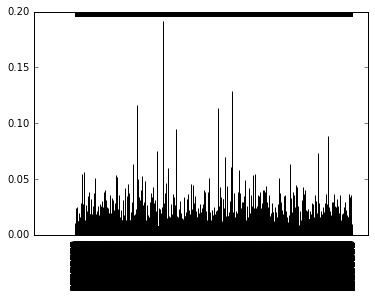

In [99]:
%matplotlib inline
plt.bar(range(len(mydict)), mydict.values(), align="center")
plt.xticks(range(len(mydict)), list(mydict.keys()), rotation = 90)
plt.show()

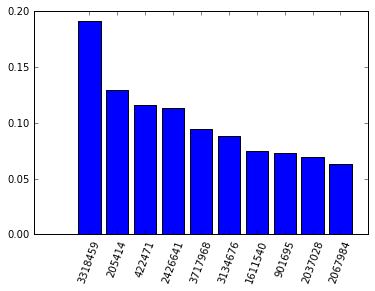

In [101]:
#Find the most common users in this list to analyze their moves
commonUsers = sorted(mydict.items(), key=lambda x:-x[1])[:10]
commonuserList = [i[0] for i in commonUsers]
commonuserFreq = [i[1] for i in commonUsers]
plt.bar(range(len(commonuserList)), commonuserFreq, align="center")
plt.xticks(range(len(commonuserList)) , commonuserList, rotation = 70)
plt.show()

In [ ]:
#Exploring our best user
bestuser = data[data.AnonID == commonUsers[0][0]]
bestuser.describe()

,AnonID,Query,QueryTime,ItemRank,ClickURL
1322868,3318459,warnerbrosarcade,2006-03-01 03:53:27,NaN,NaN
1322869,3318459,warnerbrosarcade,2006-03-01 03:53:48,NaN,NaN
1322870,3318459,cut sewing patterns,2006-03-01 03:54:09,NaN,NaN
1322871,3318459,-,2006-03-01 03:55:06,NaN,NaN
1322872,3318459,warner bros,2006-03-01 03:55:39,NaN,NaN
1322873,3318459,warner bros,2006-03-01 03:56:13,16.0,http://www2.warnerbros.com
1322874,3318459,free gife,2006-03-01 07:39:24,1.0,http://www.shopping.com
1322875,3318459,free gife,2006-03-01 07:39:24,2.0,http://www.itstimetowakeup.com
1322876,3318459,free gife,2006-03-01 07:39:24,2.0,http://www.itstimetowakeup.com
1322877,3318459,free gife,2006-03-01 07:39:24,3.0,http://ww2.ikeepbookmarks.com
